## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = ("/content/drive/My Drive/CNN")

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train_data.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test_data.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd

In [0]:
labels=pd.read_csv('labels.csv')

In [11]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [12]:
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [ ]:
#taking subset of data as it is taking more time to load

In [0]:
labels=labels[0:2000]

### Get one-hot encodings of labels

In [0]:
import numpy as np
target=pd.Series(labels['breed'])
onehot=pd.get_dummies(target)
one_hot_labels=np.array(onehot)

In [0]:
one_hot_labels['id']=one_hot_labels['id']

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows=128
img_cols=128
num_channel=1

In [23]:
from tqdm import tqdm
import cv2
x_feature=[]
y_feature=[]

for f, img in tqdm(dbc_labels.values):
  train_img =cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize=cv2.resize(train_img, (img_rows, img_cols))
  x_feature.append(train_img_resize)
  y_feature.append(img)

100%|██████████| 2000/2000 [00:04<00:00, 403.66it/s]


In [25]:
y_feature[0]

'boston_bull'

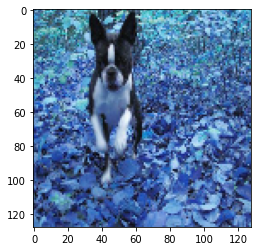

In [26]:
import matplotlib.pyplot as plt
plt.imshow(x_feature[0])

In [28]:
y_feature[1]

'dingo'

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_data=np.array(x_feature)

In [35]:
x_data.shape

(2000, 128, 128, 3)

In [36]:
x_data[0:1].shape

(1, 128, 128, 3)

In [37]:
x_data.dtype

dtype('uint8')

In [0]:
x_data = x_data.astype('float64')

In [39]:
x_data /= 255
print('x_data shape:', x_data.shape)
print(x_data.shape[0], 'data samples')
print(x_data.shape[0], 'data samples')

x_data shape: (2000, 128, 128, 3)
2000 data samples
2000 data samples


In [0]:
train_data=x_data

In [41]:
print(y_feature)

['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever', 'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound', 'shetland_sheepdog', 'walker_hound', 'maltese_dog', 'bluetick', 'norfolk_terrier', 'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer', 'doberman', 'otterhound', 'otterhound', 'bedlington_terrier', 'dingo', 'golden_retriever', 'standard_schnauzer', 'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn', 'affenpinscher', 'labrador_retriever', 'ibizan_hound', 'english_setter', 'walker_hound', 'weimaraner', 'giant_schnauzer', 'golden_retriever', 'boston_bull', 'groenendael', 'lakeland_terrier', 'irish_water_spaniel', 'dhole', 'dingo', 'affenpinscher', 'toy_poodle', 'border_terrier', 'lakeland_terrier', 'tibetan_terrier', 'norwegian_elkhound', 'african_hunting_dog', 'irish_water_spaniel', 'walker_hound', 'irish_water_spaniel', 'wire-haired_fox_terrier', 'giant_schnauzer', 'affenpinscher', 'shih-tz

In [0]:
y_data=np.array(y_feature)

In [43]:
y_data.shape

(2000,)

In [44]:
np.unique(y_feature)

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [0]:
y_train=one_hot_labels.drop(['id'],axis=1)

In [46]:
y_train.shape

(2000, 120)

In [0]:
y_train=np.array(y_train)

In [49]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [50]:
train_data.shape

(2000, 128, 128, 3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, y_train, test_size=0.2, random_state=2)
print (len(X_train))
print (len(X_test))
print (len(y_train))
print (len(y_test))

1600
400
1600
400


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
img_rows=128
img_cols=128
num_channel=1

In [0]:
test_img=pd.read_csv('sample_submission.csv')

In [57]:
test_img.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [0]:
test_data=test_img[0:2000]

In [0]:
test_img = test_data['id']

Run the below code to load the test image files in x_test_feature

In [60]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 2000/2000 [00:02<00:00, 866.07it/s]


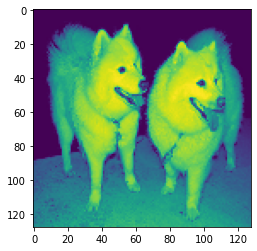

In [61]:
import matplotlib.pyplot as plt
plt.imshow(x_test_feature[1])

Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_data=np.array(x_test_feature)

In [63]:
x_test_data.shape

(2000, 128, 128)

In [64]:
x_test_data = x_test_data.astype('float64')
x_test_data /= 255
print('x_test_data shape:', x_test_data.shape)
print(x_test_data.shape[0], 'data samples')
print(x_test_data.shape[0], 'data samples')

x_test_data shape: (2000, 128, 128)
2000 data samples
2000 data samples


In [0]:
x_test_data = x_test_data.reshape(x_test_data.shape[0], 128, 128, 1) #transform 2D 28x28 matrix to 3D (28x28x1) matrix

In [66]:
x_test_data.shape

(2000, 128, 128, 1)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [67]:
# Define model
    model = Sequential()

    # 1st Conv Layer
    model.add(Convolution2D(5, 3, 3, input_shape=(128, 128, 3)))
    model.add(Activation('relu'))

    # 2nd Conv Layer
    model.add(Convolution2D(5, 3, 3))
    model.add(Activation('relu'))

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))

    # Prediction Layer
    model.add(Dense(120))
    model.add(Activation('softmax'))

    # Loss and Optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), input_shape=(128, 128,...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3))`
  


##Use batch_size = 128 and epochs = 10 and execute the model

In [68]:
# Train the model1
    Output1=model.fit(X_train, y_train, batch_size=128, nb_epoch=10, 
              validation_data=(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 7s 4ms/step - loss: 4.8015 - accuracy: 0.0081 - val_loss: 4.7936 - val_accuracy: 0.0100
Epoch 2/10
1600/1600 [==============================] - 1s 409us/step - loss: 4.5365 - accuracy: 0.2094 - val_loss: 4.9447 - val_accuracy: 0.0125
Epoch 3/10
1600/1600 [==============================] - 1s 402us/step - loss: 3.8555 - accuracy: 0.2719 - val_loss: 5.1527 - val_accuracy: 0.0100
Epoch 4/10
1600/1600 [==============================] - 1s 409us/step - loss: 2.2662 - accuracy: 0.6619 - val_loss: 5.7679 - val_accuracy: 0.0175
Epoch 5/10
1600/1600 [==============================] - 1s 405us/step - loss: 0.7308 - accuracy: 0.9119 - val_loss: 6.6976 - val_accuracy: 0.0125
Epoch 6/10
1600/1600 [==============================] - 1s 409us/step - loss: 0.1866 - accuracy: 0.9812 - val_loss: 7.1535 - val_accuracy: 0.0100
Epoch 7/10
1600/1600 [==============================] - 1s 411us/step - loss: 0

In [69]:
loss_and_metrics = model1.evaluate(X_test, y_test)
print(loss_and_metrics)

400/400 [==============================] - 0s 278us/step
[7.116919326782226, 0.014999999664723873]


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    horizontal_flip=False,  
    vertical_flip=False)  

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

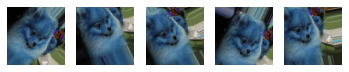

In [72]:
gen = datagen.flow(X_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

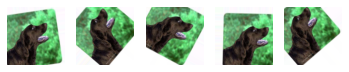

In [73]:
gen = datagen.flow(X_test[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
# Prepare the generator
datagen.fit(X_train)
datagen.fit(X_test)

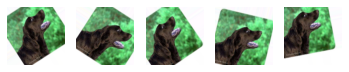

In [75]:
gen = datagen.flow(X_test[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

In [76]:
Output1=model1.fit(X_train, y_train, batch_size=128, nb_epoch=10, 
              validation_data=(X_test, y_test))

Train on 1600 samples, validate on 400 samples
Epoch 1/10
 384/1600 [======>.......................] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


1600/1600 [==============================] - 1s 416us/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 7.2529 - val_accuracy: 0.0250
Epoch 2/10
1600/1600 [==============================] - 1s 409us/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 7.1306 - val_accuracy: 0.0250
Epoch 3/10
1600/1600 [==============================] - 1s 417us/step - loss: 0.0124 - accuracy: 0.9994 - val_loss: 6.7574 - val_accuracy: 0.0250
Epoch 4/10
1600/1600 [==============================] - 1s 415us/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 6.7561 - val_accuracy: 0.0225
Epoch 5/10
1600/1600 [==============================] - 1s 418us/step - loss: 0.0067 - accuracy: 0.9994 - val_loss: 6.7205 - val_accuracy: 0.0250
Epoch 6/10
1600/1600 [==============================] - 1s 414us/step - loss: 0.0071 - accuracy: 0.9994 - val_loss: 6.6855 - val_accuracy: 0.0225
Epoch 7/10
1600/1600 [==============================] - 1s 422us/step - loss: 0.0067 - accuracy: 0.9994 - val_loss: 6.6629 - val_accura

In [77]:
loss_and_metrics = model1.evaluate(X_test, y_test)
print(loss_and_metrics)

400/400 [==============================] - 0s 245us/step
[6.523954620361328, 0.019999999552965164]


# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg', input_shape = (128,128,3))

Print the summary of the base_model

In [91]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [0]:
for layer in base_model.layers[:20]:
    layer.trainable = False

In [93]:
for layer in base_model.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f8f9651fba8> False
<keras.layers.convolutional.Conv2D object at 0x7f8f9651fbe0> False
<keras.layers.convolutional.Conv2D object at 0x7f8f9651fe48> False
<keras.layers.pooling.MaxPooling2D object at 0x7f8f9651fcf8> False
<keras.layers.convolutional.Conv2D object at 0x7f8f9652e358> False
<keras.layers.convolutional.Conv2D object at 0x7f8f9652eeb8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f8f96533a58> False
<keras.layers.convolutional.Conv2D object at 0x7f8f96533898> False
<keras.layers.convolutional.Conv2D object at 0x7f8f96538588> False
<keras.layers.convolutional.Conv2D object at 0x7f8f96538e80> False
<keras.layers.pooling.MaxPooling2D object at 0x7f8f964bfba8> False
<keras.layers.convolutional.Conv2D object at 0x7f8f964bf9e8> False
<keras.layers.convolutional.Conv2D object at 0x7f8f964c96d8> False
<keras.layers.convolutional.Conv2D object at 0x7f8f964c9e80> False
<keras.layers.pooling.MaxPooling2D object at 0x7f8f964cecf8>

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
base_model_2=Sequential()

base_model_2.add(base_model)
# Fully Connected Layer 1
#base_model_2.add(Flatten())
base_model_2.add(Dense(1024))
base_model_2.add(Activation('relu'))

    #Layer 2
base_model_2.add(Dense(256))
base_model_2.add(Activation('relu'))

# Prediction Layer
base_model_2.add(Dense(120))
base_model_2.add(Activation('softmax'))

# Loss and Optimizer
base_model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [98]:
Output1=base_model_2.fit(X_train, y_train, batch_size=128, nb_epoch=10, 
              validation_data=(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 4s 2ms/step - loss: 4.8307 - accuracy: 0.0088 - val_loss: 4.7919 - val_accuracy: 0.0025
Epoch 2/10
1600/1600 [==============================] - 2s 1ms/step - loss: 4.7013 - accuracy: 0.0269 - val_loss: 4.7833 - val_accuracy: 0.0075
Epoch 3/10
1600/1600 [==============================] - 2s 1ms/step - loss: 4.5823 - accuracy: 0.0556 - val_loss: 4.7579 - val_accuracy: 0.0225
Epoch 4/10
1600/1600 [==============================] - 2s 1ms/step - loss: 4.4392 - accuracy: 0.0800 - val_loss: 4.7407 - val_accuracy: 0.0275
Epoch 5/10
1600/1600 [==============================] - 2s 1ms/step - loss: 4.2382 - accuracy: 0.1131 - val_loss: 4.6514 - val_accuracy: 0.0375
Epoch 6/10
1600/1600 [==============================] - 2s 1ms/step - loss: 4.0276 - accuracy: 0.1456 - val_loss: 4.5669 - val_accuracy: 0.0350
Epoch 7/10
1600/1600 [==============================] - 2s 1ms/step - loss: 3.7863 - accu

In [101]:
base_model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
activation_8 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 120)               30840     
_________________________________________________________________
activation_10 (Activation)   (None, 120)              